In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import log_loss, f1_score, accuracy_score, classification_report
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/SmishingData/GhanaContextMessages.xlsx')
df.to_csv('GhanaContextMessages.csv', index=False)
X_train = df['Text']
y_train = df['Label']

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

Vectorizing Dataset

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(x_test)

Model Preparation

In [ ]:
n_estimators = [100, 200, 300, 400, 500]
train_scores = []
test_scores = []

for i in n_estimators:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)

    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(x_test, y_test))

Plotting Test and Accuracy

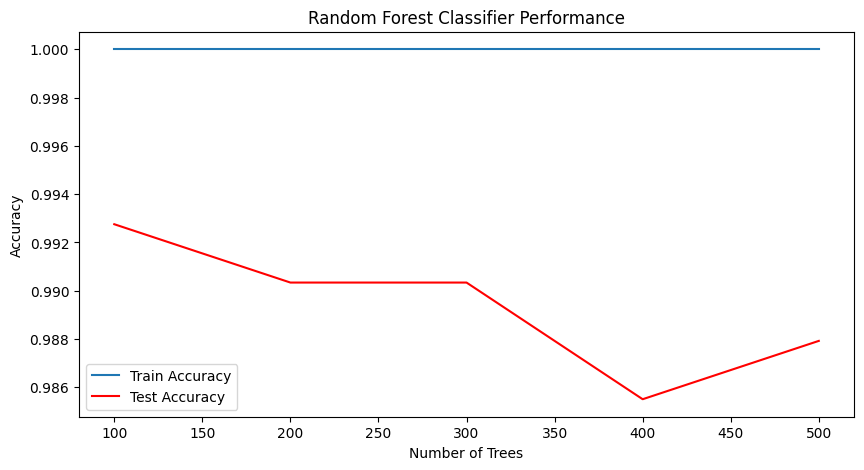

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(n_estimators, train_scores, label='Train Accuracy')
plt.plot(n_estimators, test_scores, color='red', label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Performance')
plt.legend()
plt.show()


Model Evaluation

In [ ]:
best_n = n_estimators[np.argmax(test_scores)]
best_clf = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(x_test)

# Outputing the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       231
       smish       1.00      0.97      0.98       183

    accuracy                           0.99       414
   macro avg       0.99      0.98      0.99       414
weighted avg       0.99      0.99      0.99       414



In [ ]:
joblib.dump(model, 'RFmodel.pkl')
joblib.dump(vectorizer, 'RFvectorizer.pkl')

['RFvectorizer.pkl']